In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns


# import plotly.express as px
# import plotly.graph_objects as go
# px.set_mapbox_access_token(open('mapbox_token.txt').read())

In [3]:
tripdata_raw = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Trip data/202011-citibike-tripdata.csv')

In [4]:
tripdata_raw.head()

tripduration                 starttime                  stoptime  \
0           521  2020-11-01 00:00:07.0150  2020-11-01 00:08:48.3010   
1           492  2020-11-01 00:00:10.8080  2020-11-01 00:08:23.3170   
2          1979  2020-11-01 00:00:14.7040  2020-11-01 00:33:14.1640   
3          2382  2020-11-01 00:00:14.7070  2020-11-01 00:39:57.0030   
4           166  2020-11-01 00:00:15.9690  2020-11-01 00:03:02.8980   

   start station id      start station name  start station latitude  \
0              3467  W Broadway & Spring St               40.724947   
1              3557           40 Ave & 9 St               40.757420   
2              3085    Roebling St & N 4 St               40.714690   
3              3783    Cliff St & Fulton St               40.708380   
4               422        W 59 St & 10 Ave               40.770513   

   start station longitude  end station id          end station name  \
0               -74.001659             350     Clinton St & Grand St   
1               -73.945133            3557             40 Ave & 9 St   
2               -73.957390            3854  Morgan Ave & Maspeth Ave   
3               -74.004950            3167   Amsterdam Ave & W 73 St   
4               -73.988038            3175   W 70 St & Amsterdam Ave   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.715595             -73.987030   40405  Subscriber   
1             40.757420             -73.945133   46504  Subscriber   
2             40.716657             -73.936370   37452  Subscriber   
3             40.779668             -73.980930   40417  Subscriber   
4             40.777480             -73.982886   35776  Subscriber   

   birth year  gender  
0        1989       1  
1        1970       2  
2        1989       2  
3        1981       1  
4        1990       1

In [5]:
# stn_dist.to_csv('station_distance')

In [6]:
# dock station status
stations_cleaned = pd.read_csv('/Users/bkuo/Local Documents/Bootcamp 2020/Project/Capstone/CitiBikeCapStone/Data/Dock station data/stations_cleaned.csv')
#             delim_whitespace = True)
stations_cleaned.sample(20)


/Users/bkuo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


dock_id                               dock_name        date  hour  \
3907401      2006                  Central Park S & 6 Ave  2015-06-30    10   
28561018      310                     State St & Smith St  2018-09-11    11   
27699         120             Lexington Ave & Classon Ave  2015-03-22    10   
23175188      353              S Portland Ave & Hanson Pl  2017-10-11     9   
14342535     3090                     N 8 St & Driggs Ave  2016-05-05    11   
19975407     3139                      E 72 St & Park Ave  2017-11-10     7   
16512201      460                      S 4 St & Wythe Ave  2016-09-12     6   
1697260       306                    Cliff St & Fulton St  2015-04-05    17   
2909275       305                         E 58 St & 3 Ave  2015-05-17     3   
28214267     2008                   Little West St & 1 Pl  2018-08-05     1   
16446031     3407  Coming Soon: Congress St & Columbia St  2016-08-05     2   
5346900       337                     Old Slip & Front St  2015-07-18    24   
17060334      236                     St Marks Pl & 2 Ave  2016-02-04    13   
1041590       476                         E 31 St & 3 Ave  2015-03-30    21   
3529552       466                         W 25 St & 6 Ave  2015-05-23    11   
20205313      252            MacDougal St & Washington Sq  2017-12-09    23   
31902074     3077                    Stagg St & Union Ave  2019-02-05    13   
12606975     3112                 Milton St & Franklin St  2016-03-09     9   
21662785     3243                         E 58 St & 1 Ave  2017-06-20     9   
18249453      276                 Duane St & Greenwich St  2016-01-30    22   

          minute  avail_bikes  avail_docks  tot_docks       _lat      _long  \
3907401       30           35           10         49  40.765909 -73.976342   
28561018      53            5           30         36  40.689269 -73.989129   
27699         22            3           14         19  40.686768 -73.959282   
23175188      29            1           26         27  40.685396 -73.974315   
14342535      40           22            8         31  40.717746 -73.956001   
19975407      41            2           41         43  40.771183 -73.964094   
16512201      41           18            5         23  40.712859 -73.965903   
1697260       33            6           30         30  40.708235 -74.005301   
2909275       55            8           21         33  40.760958 -73.967245   
28214267      25           17            5         24  40.705693 -74.016777   
16446031      22            0            0          0  40.689608 -74.000144   
5346900        4            4           30         37  40.703799 -74.008387   
17060334      32            0           39         39  40.728419 -73.987140   
1041590       13           31           14         14  40.743943 -73.979661   
3529552       53            2           31         35  40.743954 -73.991449   
20205313       7           28            2         30  40.732264 -73.998522   
31902074      20            1           32         33  40.708771 -73.950953   
12606975      50           14           18         33  40.729060 -73.957790   
21662785      31            0           29         29  40.758924 -73.962262   
18249453      18           21            4         25  40.717488 -74.010455   

          in_service status_key  dock_status   time  dayofweek dayofweek2  \
3907401            1          1   Full Alert  10:30          1    Tuesday   
28561018           1          1  Empty Alert  11:53          1    Tuesday   
27699              1          1  Empty Alert  10:22          6     Sunday   
23175188           1          1  Empty Alert   9:29          2  Wednesday   
14342535           1          1   Full Alert  11:40          3   Thursday   
19975407           1          1  Empty Alert   7:41          4     Friday   
16512201           1          1   Full Alert   6:41          0     Monday   
1697260            1          1  Empty Alert  17:33          6     Sunday 

In [7]:
dock = stations_cleaned.copy()
# dock['hour24'] = dock.hour
# dock[dock['hour24'] != 12].loc[dock.pm == 1, 'hour24'] = dock.hour24 + 12
dock.hour = dock.hour.astype(str).apply(lambda x: x.zfill(2))
dock.loc[dock['hour'] == '24', 'hour'] = '00'
dock.minute = dock.minute.astype(str).apply(lambda x: x.zfill(2))
dock['time'] = dock.hour + ':' + dock.minute + ':' +  '00'
dock['datetime'] = pd.to_datetime(dock['date'] + ' ' + dock['time'])
dock = dock.drop(['date', 'hour', 'minute', 'time'], axis = 1)
dock.head()

dock_id         dock_name  avail_bikes  avail_docks  tot_docks       _lat  \
0       72  W 52 St & 11 Ave            8           31         39  40.767272   
1       72  W 52 St & 11 Ave            8           31         39  40.767272   
2       72  W 52 St & 11 Ave            8           30         38  40.767272   
3       72  W 52 St & 11 Ave            8           30         38  40.767272   
4       72  W 52 St & 11 Ave            8           30         38  40.767272   

       _long  in_service status_key  dock_status  dayofweek dayofweek2  \
0 -73.993929           1          1  Empty Alert          6     Sunday   
1 -73.993929           1          1  Empty Alert          6     Sunday   
2 -73.993929           1          1  Empty Alert          6     Sunday   
3 -73.993929           1          1  Empty Alert          6     Sunday   
4 -73.993929           1          1  Empty Alert          6     Sunday   

   season            datetime  
0  spring 2015-03-01 01:06:00  
1  spring 2015-03-01 01:16:00  
2  spring 2015-03-01 01:25:00  
3  spring 2015-03-01 01:35:00  
4  spring 2015-03-01 01:45:00

In [8]:
dock.describe()

dock_id   avail_bikes   avail_docks     tot_docks          _lat  \
count  3.239142e+07  3.239142e+07  3.239142e+07  3.239142e+07  3.239142e+07   
mean   1.505113e+03  1.121125e+01  1.963295e+01  3.179422e+01  4.072800e+01   
std    1.365721e+03  1.063801e+01  1.338239e+01  1.175093e+01  7.818515e-02   
min    7.200000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.600000e+02  2.000000e+00  9.000000e+00  2.400000e+01  4.070531e+01   
50%    4.950000e+02  8.000000e+00  1.800000e+01  3.100000e+01  4.072521e+01   
75%    3.132000e+03  1.800000e+01  2.800000e+01  3.900000e+01  4.075038e+01   
max    3.534000e+03  1.160000e+02  7.900000e+01  9.800000e+01  4.407427e+02   

              _long    in_service     dayofweek  
count  3.239142e+07  3.239142e+07  3.239142e+07  
mean  -7.398373e+01  9.560140e-01  3.025526e+00  
std    1.073389e-01  2.050640e-01  1.984087e+00  
min   -7.409694e+01  0.000000e+00  0.000000e+00  
25%   -7.399695e+01  1.000000e+00  1.000000e+00  
50%   -7.398336e+01  1.000000e+00  3.000000e+00  
75%   -7.396592e+01  1.000000e+00  5.000000e+00  
max    7.397713e+01  1.000000e+00  6.000000e+00

In [9]:
#dock.to_csv('stations_more_clean')

In [12]:
# stations_more_clean = pd.read_csv('stations_more_clean')
stations_more_clean = dock
stations_more_clean.head()

dock_id         dock_name  avail_bikes  avail_docks  tot_docks       _lat  \
0       72  W 52 St & 11 Ave            8           31         39  40.767272   
1       72  W 52 St & 11 Ave            8           31         39  40.767272   
2       72  W 52 St & 11 Ave            8           30         38  40.767272   
3       72  W 52 St & 11 Ave            8           30         38  40.767272   
4       72  W 52 St & 11 Ave            8           30         38  40.767272   

       _long  in_service status_key  dock_status  dayofweek dayofweek2  \
0 -73.993929           1          1  Empty Alert          6     Sunday   
1 -73.993929           1          1  Empty Alert          6     Sunday   
2 -73.993929           1          1  Empty Alert          6     Sunday   
3 -73.993929           1          1  Empty Alert          6     Sunday   
4 -73.993929           1          1  Empty Alert          6     Sunday   

   season            datetime  
0  spring 2015-03-01 01:06:00  
1  spring 2015-03-01 01:16:00  
2  spring 2015-03-01 01:25:00  
3  spring 2015-03-01 01:35:00  
4  spring 2015-03-01 01:45:00

In [14]:
dock = stations_more_clean
# dock = dock.drop(['Unnamed: 0', '_lat', '_long'], axis = 1)
dock.datetime= pd.to_datetime(dock.datetime)

In [15]:
dock['perc_bike_avail'] = dock.avail_bikes/dock.tot_docks

In [16]:
# downsample:
#dock = dock.sample(frac = 0.1, replace=True)

In [17]:
# smaller time frame:
# start_date = '01-01-2018'
# end_date = '12-31-2018'
# mask = (dock['datetime'] > start_date) & (dock['datetime'] <= end_date)
# dock = dock.loc[mask]

In [18]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
colors = ["#39a2e1", "#263571", "#ea2029"]
sns.set_palette(sns.color_palette(colors))

In [19]:
# time of days
time_of_day = dock.copy()
time_of_day = time_of_day[['datetime','perc_bike_avail']]
time_of_day['hour'] = time_of_day['datetime'].dt.hour
time_of_day['peak'] = [1 if time > 5 and time < 20 else 0 for time in time_of_day.hour]


In [ ]:
# bike availability during peak (median value)

bka = time_of_day[['perc_bike_avail', 'hour', 'peak']].groupby('hour').median()
bka = bka.reset_index()
sns.barplot(data = bka, x = 'hour', y = "perc_bike_avail", hue = 'peak' )

# g.sns.set(rc={'figure.figsize':(12,8)})


<AxesSubplot:xlabel='dayofweek2', ylabel='perc_bike_avail'>

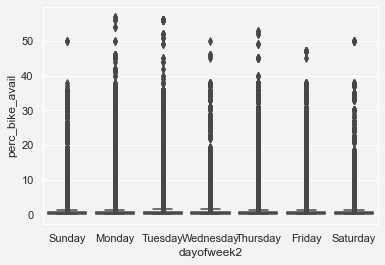

In [21]:
# day of week

# plt = dock[['dayofweek2', 'perc_bike_avail']].groupby('dayofweek2').median()

sns.boxplot(data = dock, x = 'dayofweek2', y = "perc_bike_avail")


<AxesSubplot:xlabel='dayofweek2', ylabel='perc_bike_avail'>

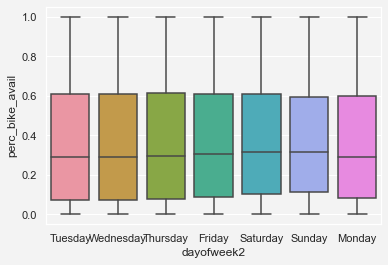

In [22]:
# day of week median availability excluding 2015
dock_no2015 = dock[dock['datetime'].dt.year != 2015]
sns.boxplot(data = dock_no2015, x = 'dayofweek2', y = "perc_bike_avail")

NameError: name 'avail_docks' is not defined

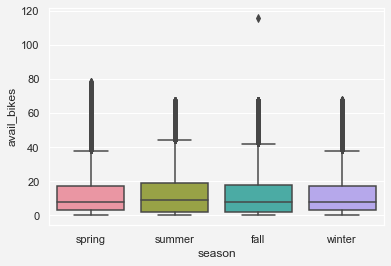

In [23]:
# seasonal bike number
sns.boxplot(data = dock, x = 'season', y = "avail_bikes")
avail_docks

In [ ]:
dock.columns

In [ ]:
# seasonal dock number
season = dock.copy()
season['year'] = season.datetime.dt.year
sns.scatterplot(data = season, x = 'year', y = "avail_docks", hue = 'season')


In [ ]:
# season availability ex 2015
sns.boxplot(data = dock_no2015, x = 'season', y = "perc_bike_avail")

In [ ]:
# yearly comparison
yr = dock[['datetime', 'perc_bike_avail']]
yr['year']= yr.datetime.dt.year
sns.boxplot(data = yr, x = 'year', y = "perc_bike_avail")



In [ ]:
# yearly comparison no 2015
yr = dock_no2015[['datetime', 'perc_bike_avail']]
yr['year']= yr.datetime.dt.year
sns.boxplot(data = yr, x = 'year', y = "perc_bike_avail")



In [15]:
# # sns.set_theme(style="white")

# # Generate a large random dataset

# d = pd.DataFrame(dock,
#                  columns=list(ascii_letters[26:]))

# # Compute the correlation matrix
# corr = d.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

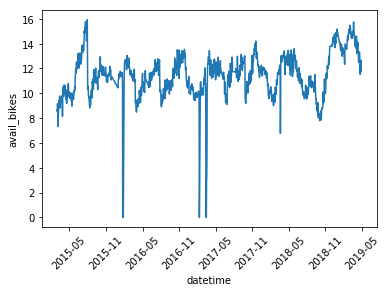

In [16]:
# daily average of bikes/docks
mday = dock.groupby(pd.Grouper(key="datetime", freq="D"))\
    .agg({'avail_bikes':'mean',
          'avail_docks':'mean'})
df = mday

# day vs available bikes
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

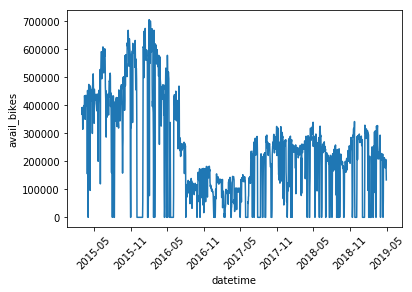

In [17]:
# daily total bikes/docks
day = dock.groupby(pd.Grouper(key="datetime", freq="D"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum'})
df = day

# day vs available bikes
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)


# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

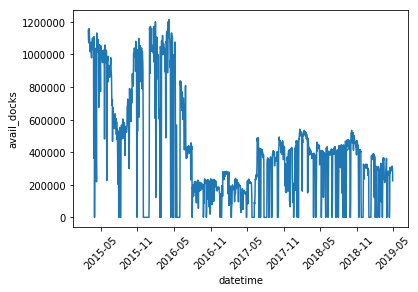

In [18]:
# day vs available docks
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=45)


(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

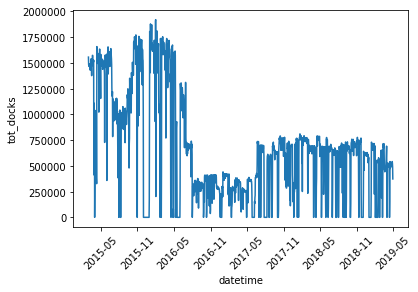

In [19]:
# day vs total docks
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=45)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

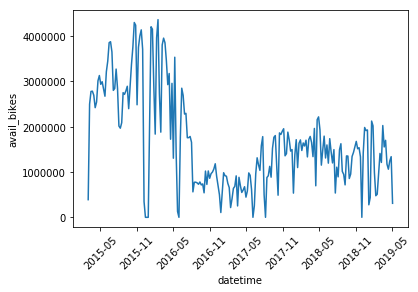

In [20]:
# week
wk = dock.groupby(pd.Grouper(key = "datetime", freq="W"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum'})
df = wk

# week vs. total docks
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=45)

# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

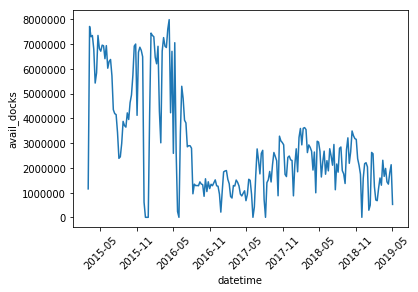

In [21]:
# week vs available docks
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=45)



(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

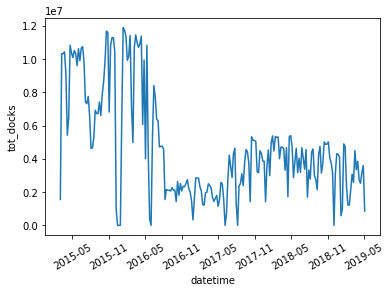

In [22]:
# week vs total docks
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

In [23]:
# month
month = dock.groupby(pd.Grouper(key="datetime", freq="M"))\
    .agg({'avail_bikes':'sum',
         'avail_docks':'sum',
         'tot_docks':'sum',
          'perc_bike_avail':'mean'})
df = month

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

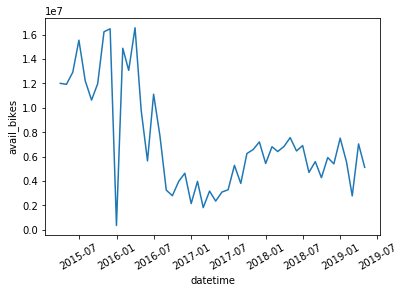

In [24]:
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=30)

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

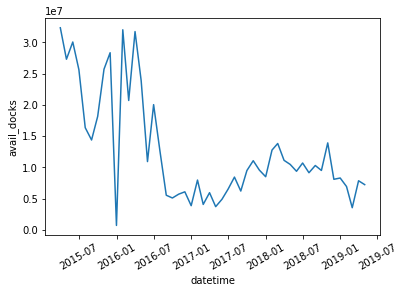

In [25]:
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=30)

(array([735780., 735964., 736146., 736330., 736511., 736695., 736876.,
        737060., 737241.]), <a list of 9 Text xticklabel objects>)

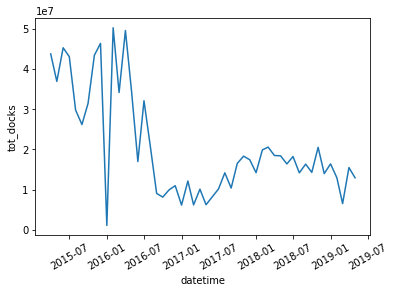

In [26]:
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

(array([735719., 735903., 736085., 736269., 736450., 736634., 736815.,
        736999., 737180.]), <a list of 9 Text xticklabel objects>)

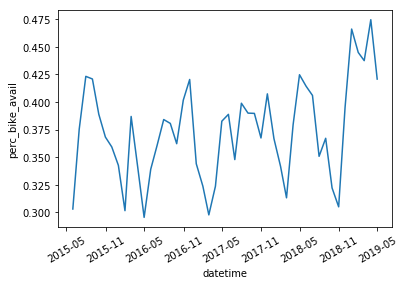

In [27]:
sns.lineplot(data=df, x=df.index, y=df.perc_bike_avail)
plt.xticks(rotation=30)

In [28]:
# year
yr = dock.groupby(pd.Grouper(key="datetime", freq="Y"))\
    .agg({'avail_bikes':'sum',
          'avail_docks':'sum',
          'tot_docks':'sum',
          'perc_bike_avail':'mean'})
df = yr
# fig = px.bar(df, x = df.index, y = "avail_bikes")
# fig.show()
# fig = px.bar(df, x = df.index, y = "avail_docks")
# fig.show()
# fig = px.bar(df, x = df.index, y = "tot_docks")
# fig.show()

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

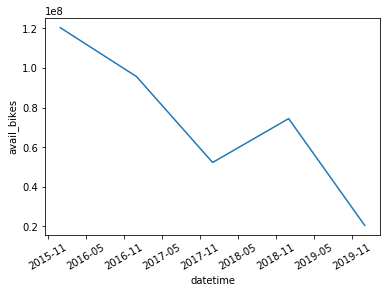

In [29]:
sns.lineplot(data=df, x=df.index, y=df.avail_bikes)
plt.xticks(rotation=30)

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

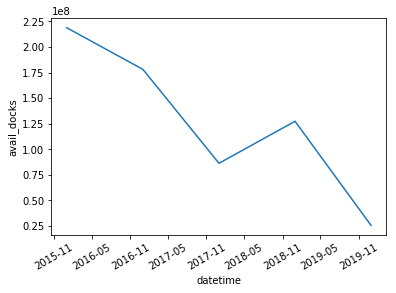

In [30]:
sns.lineplot(data=df, x=df.index, y=df.avail_docks)
plt.xticks(rotation=30)

(array([735903., 736085., 736269., 736450., 736634., 736815., 736999.,
        737180., 737364.]), <a list of 9 Text xticklabel objects>)

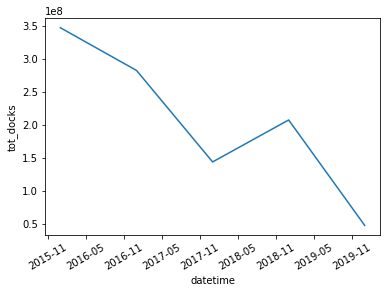

In [31]:
sns.lineplot(data=df, x=df.index, y=df.tot_docks)
plt.xticks(rotation=30)

(array([736389., 736511., 736634., 736754., 736876., 736999., 737119.,
        737241., 737364.]), <a list of 9 Text xticklabel objects>)

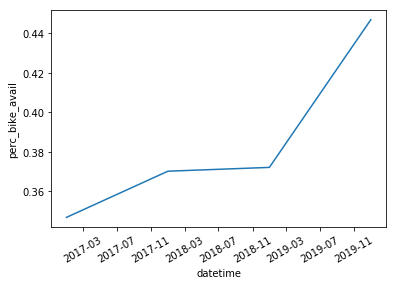

In [32]:
sns.lineplot(data=df, x=df.index, y=df.perc_bike_avail)
plt.xticks(rotation=30)

In [33]:
# real time station status 
url = 'https://gbfs.citibikenyc.com/gbfs/fr/station_status.json'

station_status = pd.read_json(path_or_buf = url)
station_status = pd.DataFrame(station_status.data[0])

In [34]:
station_status.head()#[['station_id', 'num_docks_available']]


eightd_has_available_keys  is_installed  is_renting  is_returning  \
0                      False             1           1             1   
1                      False             1           1             1   
2                      False             1           1             1   
3                      False             1           1             1   
4                      False             1           1             1   

   last_reported legacy_id  num_bikes_available  num_bikes_disabled  \
0     1607676544        72                   10                   1   
1     1607670918        79                   19                   1   
2     1607669418        82                   13                   3   
3     1607668211        83                   34                   1   
4     1607670625       116                   17                   2   

   num_docks_available  num_docks_disabled  num_ebikes_available station_id  \
0                   44                   0                     2         72   
1                   13                   0                     2         79   
2                   11                   0                     2         82   
3                   27                   0                     0         83   
4                   31                   0                     2        116   

  station_status  
0         active  
1         active  
2         active  
3         active  
4         active

In [35]:
station_status[station_status.station_status == 'active'][['station_id', 'num_docks_available']].shape

(1208, 2)

In [36]:
# free_bike_status - no info
url = 'https://gbfs.citibikenyc.com/gbfs/fr/free_bike_status.json'
free_bike_status = pd.read_json(path_or_buf = url)
free_bike_status

data  last_updated  ttl
bikes   []    1607681800    5

In [37]:
# staion information
url = 'https://gbfs.citibikenyc.com/gbfs/fr/station_information.json'
station_info = pd.read_json(path_or_buf = url)
station_info = pd.DataFrame(station_info.data[0])
station_info

capacity  eightd_has_key_dispenser eightd_station_services  \
0           55                     False                      []   
1           33                     False                      []   
2           27                     False                      []   
3           62                     False                      []   
4           50                     False                      []   
5           53                     False                      []   
6           19                     False                      []   
7           31                     False                      []   
8           56                     False                      []   
9           24                     False                      []   
10          58                     False                      []   
11          39                     False                      []   
12          55                     False                      []   
13          33                      True                      []   
14          49                     False                      []   
15          23                     False                      []   
16          35                     False                      []   
17          47                     False                      []   
18          47                     False                      []   
19          70                     False                      []   
20          35                     False                      []   
21          60                     False                      []   
22          37                     False                      []   
23          39                     False                      []   
24          33                     False                      []   
25          34                      True                      []   
26          55                     False                      []   
27          23                     False                      []   
28          51                     False                      []   
29          39                     False                      []   
...        ...                       ...                     ...   
1184        19                     False                      []   
1185        27                     False                      []   
1186        19                     False                      []   
1187        19                     False                      []   
1188        18                     False                      []   
1189        24                     False                      []   
1190        19                     False                      []   
1191        19                     False                      []   
1192        19                     False                      []   
1193        28                     False                      []   
1194        32                     False                      []   
1195        27                     False                      []   
1196        27                     False                      []   
1197        33                     False                      []   
1198        19                     False                      []   
1199        19                     False                      []   
1200        24                     False                      []   
1201        19                     False                      []   
1202        45                     False                      []   
1203        55                     False                      []   
1204        59                     False                      []   
1205        79                     False                      []   
1206        25                     False                      []   
1207        24                     False                      []   
1208        21                     False                      []   
1209        63                     False                      []   
1210        25                     False                      